<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/Cyberbullying_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('wordnet')
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/cyberbullying_twitter.csv'
df = pd.read_csv(url,error_bad_lines=False)
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


## Text preprocessing

In [4]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

from wordcloud import STOPWORDS
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 't', 's'])

def lower(text):
    return text.lower()

def remove_twitter(text):
    return re.sub(TEXT_CLEANING_RE, ' ', text)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def clean_text(text):
    text = lower(text)
    text = remove_twitter(text)
    text = remove_stopwords(text)
    return text


In [5]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = STOPWORDS).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [6]:
df['tweet_text']=df['tweet_text'].apply(clean_text)

In [9]:
from nltk.stem import WordNetLemmatizer

lematizer=WordNetLemmatizer()

def lemmatizer_words(text):
    return " ".join([lematizer.lemmatize(word) for word in text.split()])

df['tweet_text']=df['tweet_text'].apply(lambda text: lemmatizer_words(text))

In [10]:
df.cyberbullying_type.unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

## Gender-based hatred in twitter posts

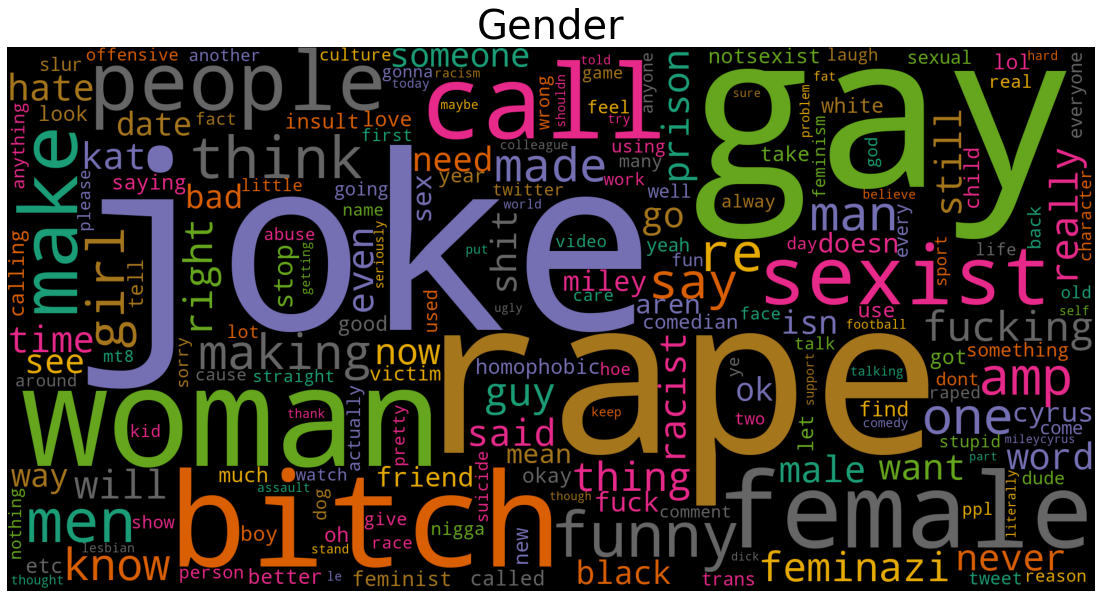

In [11]:
from wordcloud import WordCloud

plt.figure(figsize=(20,10))
subset1 = df[df['cyberbullying_type']=='gender']
text_gender = subset1.tweet_text.values
cloud1=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_gender))

plt.axis('off')
plt.title("Gender",fontsize=40)
plt.imshow(cloud1)
plt.show()

## Religion-based Hate Speeches

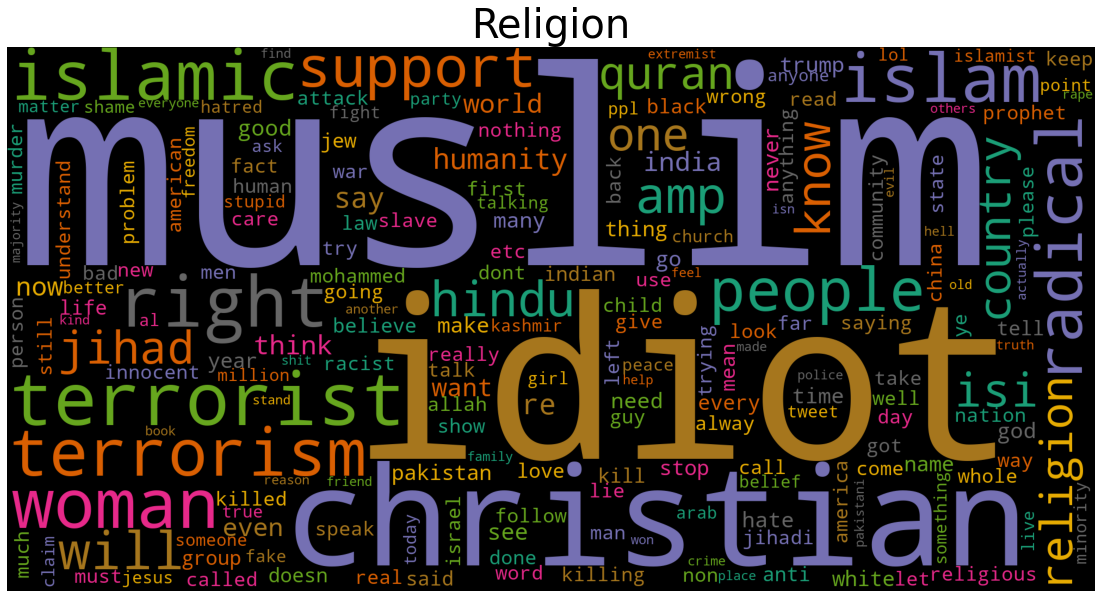

In [23]:
plt.figure(figsize=(20,10))
subset2 = df[df['cyberbullying_type']=='religion']
text_religion = subset2.tweet_text.values
cloud2=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_religion))

plt.axis('off')
plt.title("Religion",fontsize=40)
plt.imshow(cloud2)
plt.show()

## Age-based Hatred

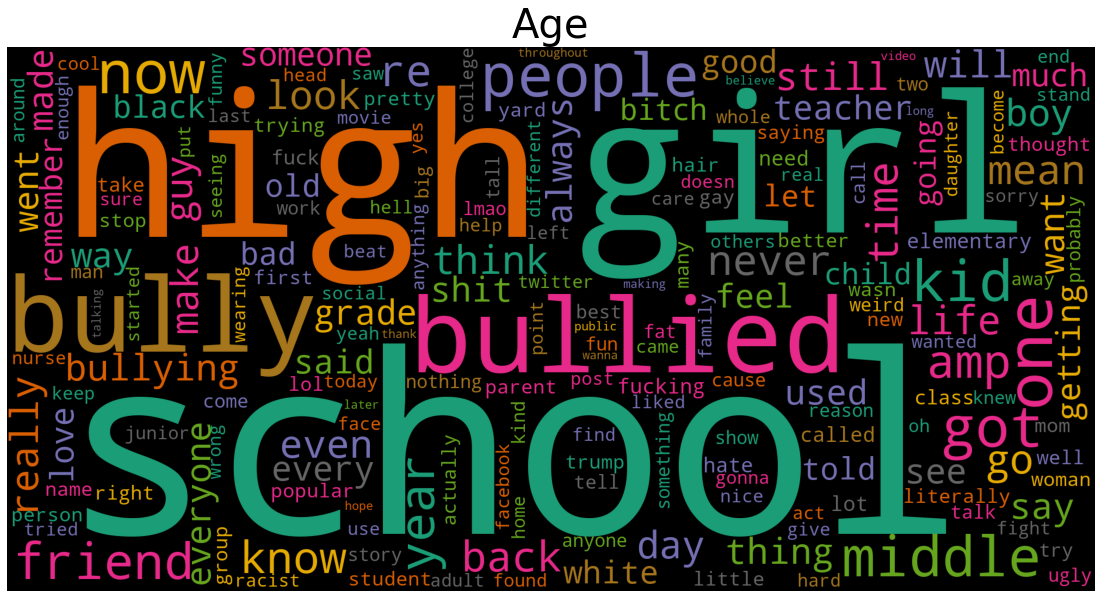

In [22]:
plt.figure(figsize=(20,10))
subset3 = df[df['cyberbullying_type']=='age']
text_age = subset3.tweet_text.values
cloud3=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_age))

plt.axis('off')
plt.title("Age",fontsize=40)
plt.imshow(cloud3)
plt.show()

## Ethnicity-based Hate Speech

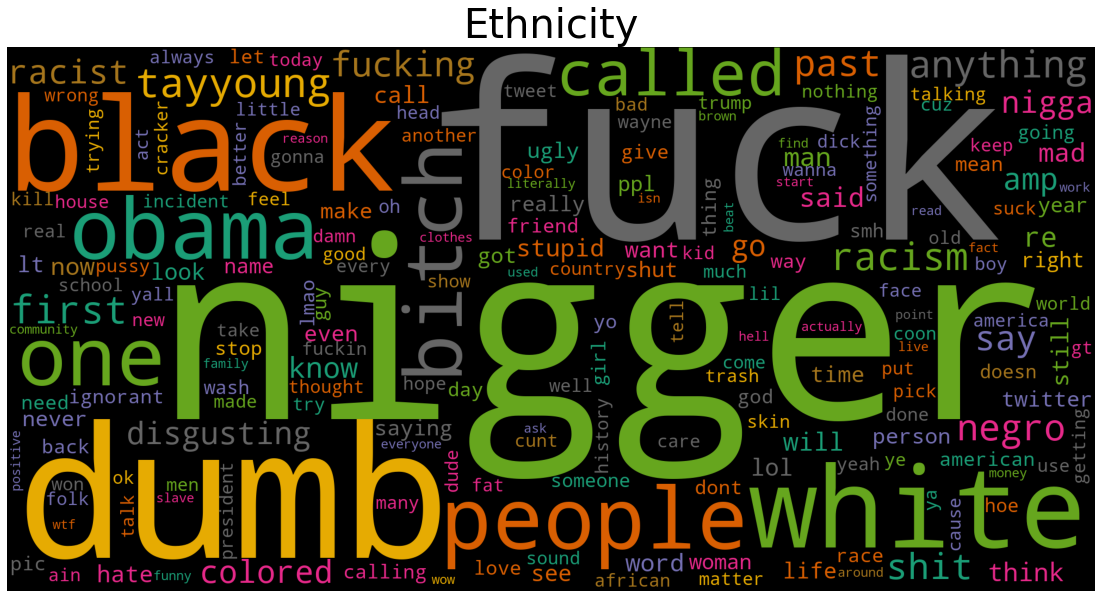

In [21]:
plt.figure(figsize=(20,10))
subset4 = df[df['cyberbullying_type']=='ethnicity']
text_ethnicity = subset4.tweet_text.values
cloud4=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_ethnicity))

plt.axis('off')
plt.title("Ethnicity",fontsize=40)
plt.imshow(cloud4)
plt.show()

## Other hatreds

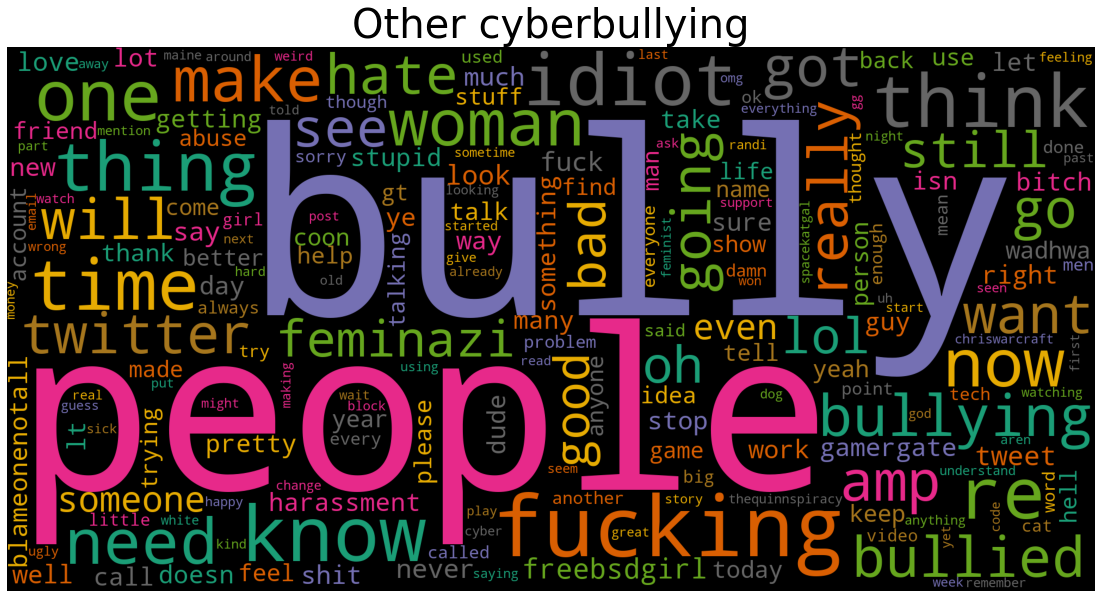

In [19]:
plt.figure(figsize=(20,10))
subset5 = df[df['cyberbullying_type']=='other_cyberbullying']
text_other = subset5.tweet_text.values
cloud5=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_other))

plt.axis('off')
plt.title("Other cyberbullying",fontsize=40)
plt.imshow(cloud5)
plt.show()